# Machine Learning Engineer Nanodegree

## Capstone Project - Smile Detector


## Notebook for Data preparation, exploration and miscellaneous functionalities

---

In this notebook, we are discussing about Data exploration and exploratory visualization. Also, miscellaneous python functions to ease the data extraction, data preparation and other tasks are implemented.



### The Road Ahead

The notebook is broken into separate steps so as to navigate easily using the links below.

* [Step 0](#step0): Data Exploration and Exploratory Visualization
* [Step 1](#step1): Misc - creating subset of CelibA dataset and splitting it

---
<a id='step0'></a>
## Step 0: Data Exploration and Exploratory Visualization

The dataset is downloaded from Kaggle - https://www.kaggle.com/jessicali9530/celeba-dataset . The attributes are available as a part of the dataset in `list_attr_celeba.csv`. Cropped and aligned images (.jpg) are being used in this project and is taken from the above mentioned Kaggle website. Each image is of the dimension of 178 x 218. Let us consider a sample image.

In [1]:
# imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import cv2
import matplotlib.pyplot as plt

In [2]:
IMAGE_PATH = 'CelibA/img_align_celeba/000043.jpg'

In [3]:
def showSampleImage():
    # load color (BGR) image
    img = cv2.imread(IMAGE_PATH)

    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # display the image
    plt.imshow(cv_rgb)
    plt.show()

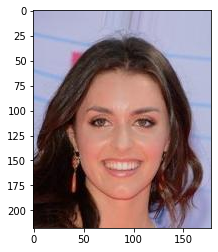

In [4]:
showSampleImage()

We will now consider the attributes that are available as a part of the dataset - `list_attr_celeba.csv`. 

In [5]:
ATTR_PATH = "CelibA\list_attr_celeba.csv"
list_attr = pd.read_csv(ATTR_PATH)
list_attr.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [6]:
for x,y in enumerate(list_attr.columns):
    print (x,y)

0 image_id
1 5_o_Clock_Shadow
2 Arched_Eyebrows
3 Attractive
4 Bags_Under_Eyes
5 Bald
6 Bangs
7 Big_Lips
8 Big_Nose
9 Black_Hair
10 Blond_Hair
11 Blurry
12 Brown_Hair
13 Bushy_Eyebrows
14 Chubby
15 Double_Chin
16 Eyeglasses
17 Goatee
18 Gray_Hair
19 Heavy_Makeup
20 High_Cheekbones
21 Male
22 Mouth_Slightly_Open
23 Mustache
24 Narrow_Eyes
25 No_Beard
26 Oval_Face
27 Pale_Skin
28 Pointy_Nose
29 Receding_Hairline
30 Rosy_Cheeks
31 Sideburns
32 Smiling
33 Straight_Hair
34 Wavy_Hair
35 Wearing_Earrings
36 Wearing_Hat
37 Wearing_Lipstick
38 Wearing_Necklace
39 Wearing_Necktie
40 Young


Let us now consider the attribute that we are interested in for the sample image

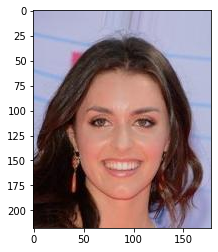

Smiling    1
Name: 000043.jpg, dtype: int64

In [7]:
showSampleImage()
list_attr.set_index('image_id', inplace=True)
list_attr.loc[IMAGE_PATH.split('/')[-1]] [['Smiling']]

In [8]:
list_attr = pd.read_csv(ATTR_PATH)
list_attr_smile = list_attr[['image_id','Smiling']]
list_attr_smile.set_index('image_id', inplace=True)
list_attr_smile.replace ({'Smiling': {-1: 0}}, inplace=True);

list_attr_smile.describe()


C:\Users\Jyothi\Anaconda3\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


,Smiling
count,202599.00000
mean,0.48208
std,0.49968
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


In [9]:
list_attr_smile.head()

,Smiling
image_id,
000001.jpg,1
000002.jpg,1
000003.jpg,0
000004.jpg,0
000005.jpg,0


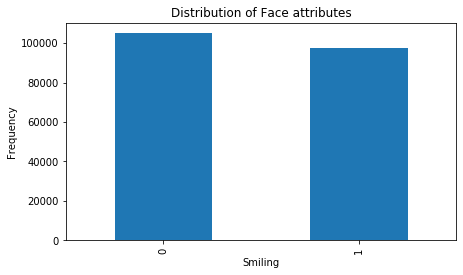

In [10]:
# Plotting the distribution of face attributes (not Smiling/Smiling)
ax = list_attr_smile['Smiling'].value_counts().plot(kind='bar',
                                    figsize=(7,4),
                                    title="Distribution of Face attributes")
ax.set_xlabel("Smiling")
ax.set_ylabel("Frequency")
plt.show()

<a id='step1'></a>
## Step 1: Creating a subset of the CelibA dataset and splitting it into Train, Validate and Test
The dataset is downloaded and a subset of it is considered for Training, Validation and Testing based on the preferred partition as given in `list_eval_partition.csv` file.

In [11]:
PARTITION_PATH = "CelibA\list_eval_partition.csv"
list_partition = pd.read_csv(PARTITION_PATH)

list_partition.set_index('image_id', inplace=True)
list_partition['partition'].value_counts().sort_index()


0    162770
1     19867
2     19962
Name: partition, dtype: int64

In [12]:
list_attr_partition = list_attr_smile.join(list_partition, how='inner')
list_attr_partition.head()

,Smiling,partition
image_id,,
000001.jpg,1,0
000002.jpg,1,0
000003.jpg,0,0
000004.jpg,0,0
000005.jpg,0,0


In [13]:
def create_dir(directory):
    if not os.path.exists(directory):
        try:
            os.makedirs(directory)
        except OSError:
            print ("Creation of the directory %s failed" % directory)
        else:
            print ("Successfully created the directory %s" % directory)

In [14]:
# create directories for input and dataset
dir_for_input = "input\dataset"

# create subdirectories for each of train, validate and test and '0' and '1' for positive and negative samples for each
dataset_dirs = ["\\train", "\\validate", "\\test"]
for _ in dataset_dirs:
    dir_to_create = dir_for_input + _
    create_dir(dir_to_create + "\\0")
    create_dir(dir_to_create + "\\1")

In [15]:
NUM_TRAINING = 10000
NUM_VAL = NUM_TRAINING * 0.25
NUM_TEST = NUM_TRAINING * 0.25

# creating a subset of train, validation and test files
smile_train = list_attr_partition[(list_attr_partition.partition == 0) & 
                                  (list_attr_partition.Smiling == 0)].sample(int(NUM_TRAINING / 2))
smile_train = pd.concat([smile_train,
                       list_attr_partition[(list_attr_partition.partition == 0) & 
                                  (list_attr_partition.Smiling == 1)].sample(int(NUM_TRAINING / 2))])
                        
print("Train:", smile_train['Smiling'].value_counts())

smile_val = list_attr_partition[(list_attr_partition.partition == 1) & 
                                  (list_attr_partition.Smiling == 0)].sample(int(NUM_VAL / 2))
smile_val = pd.concat([smile_val,
                       list_attr_partition[(list_attr_partition.partition == 1) & 
                                  (list_attr_partition.Smiling == 1)].sample(int(NUM_VAL / 2))])
print("Validation:", smile_val['Smiling'].value_counts())

smile_test = list_attr_partition[(list_attr_partition.partition == 2) & 
                                  (list_attr_partition.Smiling == 0)].sample(int(NUM_TEST / 2))
smile_test = pd.concat([smile_test,
                       list_attr_partition[(list_attr_partition.partition == 2) & 
                                  (list_attr_partition.Smiling == 1)].sample(int(NUM_TEST / 2))])
print("Test:", smile_test['Smiling'].value_counts())

Train: 1    5000
0    5000
Name: Smiling, dtype: int64
Validation: 1    1250
0    1250
Name: Smiling, dtype: int64
Test: 1    1250
0    1250
Name: Smiling, dtype: int64


In [16]:
smile_train.head()

,Smiling,partition
image_id,,
026623.jpg,0,0
095798.jpg,0,0
144875.jpg,0,0
101074.jpg,0,0
098794.jpg,0,0


In [17]:
# copy the images
def copy_images(data_frame, folder):
    for x,y in data_frame.iterrows():
        if y['Smiling'] == 0: 
            shutil.copy("CelibA/img_align_celeba/" + x,"input/dataset/" + folder + "/0/")
        else:
            shutil.copy("CelibA/img_align_celeba/" + x,"input/dataset/"+ folder + "/1")            

In [18]:
# copy images for train category
copy_images(smile_train, "train")
# copy images for validate category
copy_images(smile_val, "validate")
# copy images for test category
copy_images(smile_test, "test")